In [287]:
import matplotlib.pyplot as plt
import numpy as np
from linregress import linregress_w as linr

In [288]:
U = np.array([2.2,2.5,2.8,3.1,3.4,3.7,4,4.3,4.6,4.9])
D1 = np.array([3.6,3.5,3.2,3,2.8,2.8,2.6,2.6,2.4,2.4])
D2 = np.array([6.4,5.6,5.4,5.2,4.8,4.6,4.56,4.4,4.2,4.2])

In [289]:
def de_Broglie(V):
    h = 6.62607015e-34
    m = 9.11e-31
    e = 1.6e-19
    return h / np.sqrt(2 * m * e * V)

In [290]:
def error_de_Broglie(V, dV=0.1):
    h = 6.62607015e-34
    m = 9.11e-31
    e = 1.6e-19
    return -1*h / np.sqrt(2 * m * e * V) * dV / (2*V**(-3/2))

In [291]:
def Bragg(D1,D2,d1=213*10e-12,d2=123*10e-12):
    a = 2*d1 * np.sin(D1/100/(2*0.135))
    b = 2*d2 * np.sin(D2/100/(2*0.135))
    return [a,b]

In [292]:
def error_Bragg(D1,D2,d1=213*10e-12,d2=123*10e-12,e1=0.01,e2=0.01):
    a = 2*d1 * np.cos(D1/100/(2*0.135)) /(2*0.135) * e1
    b = 2*d2 * np.cos(D2/100/(2*0.135)) /(2*0.135) * e2
    return [a,b]

In [293]:
Broglie = de_Broglie(U)
Broglie

array([8.27390464e-10, 7.76161055e-10, 7.33403260e-10, 6.97013203e-10,
       6.65552614e-10, 6.38000457e-10, 6.13609191e-10, 5.91817256e-10,
       5.72193521e-10, 5.54400753e-10])

In [294]:
edb = error_de_Broglie(U)
edb

array([-1.34994022e-10, -1.53402298e-10, -1.71810573e-10, -1.90218849e-10,
       -2.08627125e-10, -2.27035401e-10, -2.45443676e-10, -2.63851952e-10,
       -2.82260228e-10, -3.00668504e-10])

In [295]:
Bragg = Bragg(D1,D2)
Bragg

[array([5.66318532e-10, 5.50676945e-10, 5.03707720e-10, 4.72359997e-10,
        4.40986357e-10, 4.40986357e-10, 4.09588519e-10, 4.09588519e-10,
        3.78168208e-10, 3.78168208e-10]),
 array([5.77665930e-10, 5.06571973e-10, 4.88726554e-10, 4.70854318e-10,
        4.35033322e-10, 4.17086527e-10, 4.13494391e-10, 3.99116847e-10,
        3.81125268e-10, 3.81125268e-10])]

In [296]:
ebg = error_Bragg(D1,D2)
ebg

[array([1.56377385e-10, 1.56453997e-10, 1.56670951e-10, 1.56804842e-10,
        1.56930131e-10, 1.56930131e-10, 1.57046808e-10, 1.57046808e-10,
        1.57154868e-10, 1.57154868e-10]),
 array([8.85634635e-11, 8.91584250e-11, 8.92949549e-11, 8.94265852e-11,
        8.96751186e-11, 8.97920080e-11, 8.98147949e-11, 8.99039706e-11,
        9.00110002e-11, 9.00110002e-11])]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Gráfica de D1,2 contra U^(-1/2)')

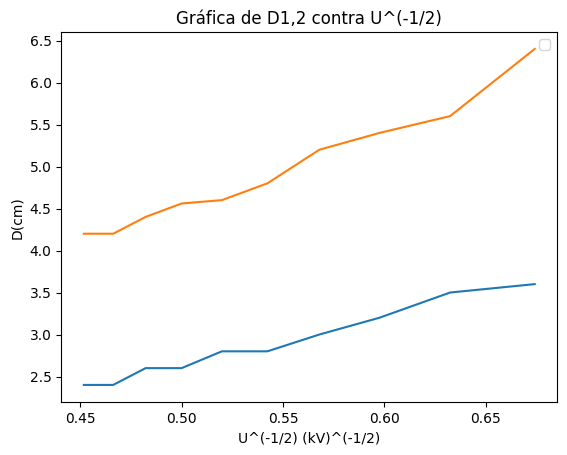

In [297]:
V = U**(-1/2)
plt.plot(V,D1)
plt.plot(V,D2)
plt.legend()
plt.ylabel("D(cm)")
plt.xlabel("U^(-1/2) (kV)^(-1/2)")
plt.title("Gráfica de D1,2 contra U^(-1/2)")

[0.01 0.31 0.61 0.91 1.21 1.51 1.81 2.11 2.41 2.71]


Text(0.5, 1.0, 'Gráfica de D1,2 pasando por (0,0) contra U^(-1/2)')

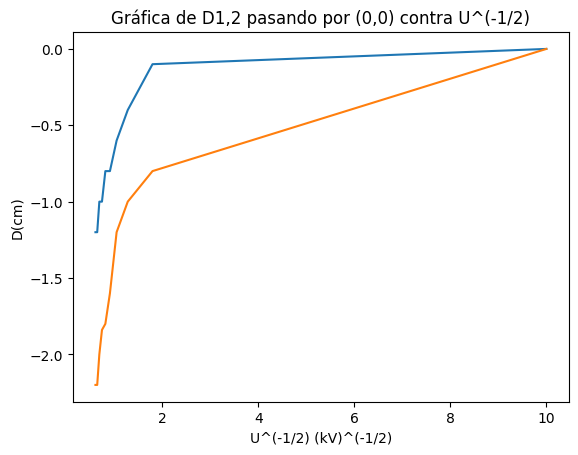

In [298]:
D100 = D1 - D1[0]
D200 = D2 - D2[0]
U00 = U - U[0] + 0.01
print(U00)
V00 = U00**(-1/2)
plt.plot(V00,D100)
plt.plot(V00,D200)
plt.ylabel("D(cm)")
plt.xlabel("U^(-1/2) (kV)^(-1/2)")
plt.title("Gráfica de D1,2 pasando por (0,0) contra U^(-1/2)")

0.1709789905350326 $\pm$ 0.0007787349602179264 
 0.049338927414857486 $\pm$ 0.002272652294920683


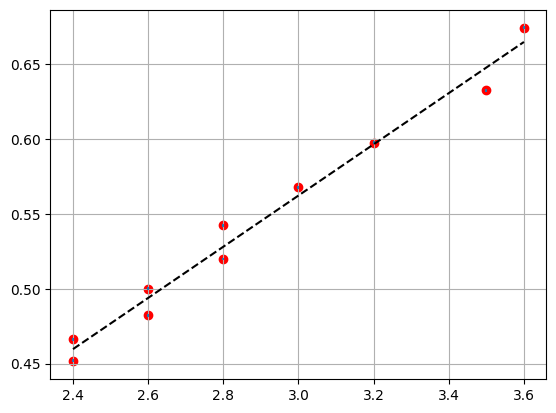

In [299]:
x = D1
y = V
dy = np.array([0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001])
lin_reg = linr(x,y,dy)


f= lambda x: lin_reg.slope()*x+lin_reg.intercept()

x_p= np.linspace(min(x),max(x),500)

plt.scatter(x,y,c="r")
plt.grid()
plt.errorbar(x, y, yerr= dy, linestyle="")

plt.plot(x_p,f(x_p),c="k",linestyle="--")

print(lin_reg.slope(),"$\pm$",lin_reg.err_slope(),"\n",lin_reg.intercept(),
      "$\pm$",lin_reg.err_intercept())

0.10274357475675547 $\pm$ 0.0004707438508168029 
 0.03632592506176539 $\pm$ 0.00234501133151718


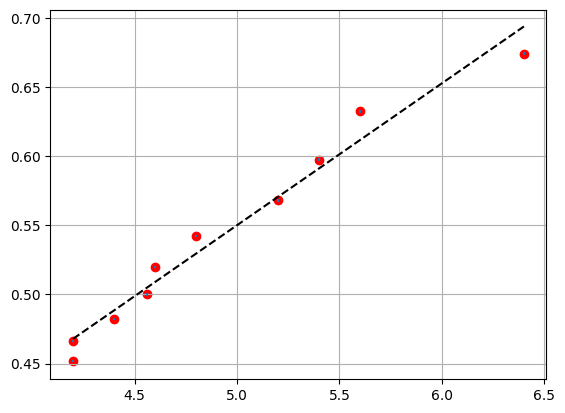

In [300]:
x = D2
y = V
dy = np.array([0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001])
lin_reg = linr(x,y,dy)


f= lambda x: lin_reg.slope()*x+lin_reg.intercept()

x_p= np.linspace(min(x),max(x),500)

plt.scatter(x,y,c="r")
plt.grid()
plt.errorbar(x, y, yerr= dy, linestyle="")

plt.plot(x_p,f(x_p),c="k",linestyle="--")

print(lin_reg.slope(),"$\pm$",lin_reg.err_slope(),"\n",lin_reg.intercept(),
      "$\pm$",lin_reg.err_intercept())